In [31]:
import os
os.environ["PATH"] += ":/usr/local/texlive/2024/bin/universal-darwin"

import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from helpers import save_dict,load_dict
from plotting_helpers import add_gridlines, highlight_k_points

import sys
sys.path.append('..')
from correlations import undo_marshall_sign


In [32]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

bigger_font_size=22
column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Load Data

In [33]:
base_path = './../final_plotting/data/'
Ls = np.arange(6,37,6)

In [46]:
all_scales = [0.25,0.5,1.,2.,4.0]
scales = [1.,2.,4.,8.]
rates = [0.475]
Ts = [0.25,1.00]
mss = ['No', 'Square', 'Triangular']
ws = 'all'

nh = 256
exp_name = 'Jan15_signrules'

data = {}
for ms in mss:
    for bc in ['periodic']:
        print("\n","--"*50)
        print(f"\n{ms} Marshall Sign, {bc} Boundary")
        data[f'{ms}MS,{bc}BC'] = {}
        for scale in scales:
            for rate in rates:
                for T in Ts:
                    T = "{:.2f}".format(T)
                    print(f"Scale = {scale}, Rate={rate}, T={T}")
                    data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"] = {}
                    l=6
                    N = l**2
                    data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"] = {}

                    path = base_path 
                    path += f'/Triangular_{ms}MS/{bc}/{exp_name}/nh{nh}_{ws}WS/scale{scale}_rate{rate}_T{T}/N_{l**2}/No_Annealing_h_l_Symmetries/seed_100'

                    energies = np.load(path + '/meanEnergy.npy')
                    free_energies = np.load(path + '/meanFreeEnergy.npy')
                    data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['energies'] = energies
                    data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['free energies'] = free_energies
                    data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['entropy term'] = energies - free_energies
                    data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['temperatures'] = np.load(path + '/temperatures.npy')

                    if os.path.exists(path + f'/final_energies/ns10000/final_energies_mean_N{N}.npy'):
                        print("energies")
                        final_en = np.real(np.load(path + f'/final_energies/ns10000/final_energies_mean_N{N}.npy'))
                        final_en_var = np.real(np.load(path + f'/final_energies/ns10000/final_energies_var_N{N}.npy'))
                        data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['final energy'] = final_en/N
                        data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['final energy var'] = final_en_var/N**2
                    
                    if os.path.exists(path + f'/final_correlations/ns_10000/Sz_matrix.npy'):
                        print("correlations")
                        Sz = np.load(path + f'/final_correlations/ns_10000/Sz_matrix.npy')
                        Sxy = np.load(path + f'/final_correlations/ns_10000/Sxy_matrix.npy')
                        if ms=='Square':
                            minus_sign_matrix = undo_marshall_sign(l)
                            Sxy *= minus_sign_matrix
                        data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['Sz'] = Sz
                        data[f'{ms}MS,{bc}BC'][f"scale={scale},rate={rate},T={T}"][f"L={l}"]['Sxy'] = Sxy




 ----------------------------------------------------------------------------------------------------

No Marshall Sign, periodic Boundary
Scale = 1.0, Rate=0.475, T=0.25
energies
correlations
Scale = 1.0, Rate=0.475, T=1.00
energies
correlations
Scale = 2.0, Rate=0.475, T=0.25
energies
correlations
Scale = 2.0, Rate=0.475, T=1.00
energies
correlations
Scale = 4.0, Rate=0.475, T=0.25
energies
correlations
Scale = 4.0, Rate=0.475, T=1.00
energies
correlations
Scale = 8.0, Rate=0.475, T=0.25
energies
correlations
Scale = 8.0, Rate=0.475, T=1.00
energies
correlations

 ----------------------------------------------------------------------------------------------------

Square Marshall Sign, periodic Boundary
Scale = 1.0, Rate=0.475, T=0.25
energies
correlations
Scale = 1.0, Rate=0.475, T=1.00
energies
correlations
Scale = 2.0, Rate=0.475, T=0.25
energies
correlations
Scale = 2.0, Rate=0.475, T=1.00
energies
correlations
Scale = 4.0, Rate=0.475, T=0.25
energies
correlations
Scale = 4.0, R

In [47]:
sign_marker={'No':'o','Square':'s','Triangular':'^'}
T_alphas={'0.25':0.4,'1.00':0.9}
T_lines={'0.25':'--','1.00':'-'}

colorscale_no = plt.get_cmap('Greys')
colorscale_sq = plt.get_cmap('viridis')
colorscale_tri = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,len(all_scales)+1)[::-1][:-1]
colors_no = colorscale_no(shades[::-1])
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'No':{1.0:colors_no[2],2.0:colors_no[3],4.0:colors_no[4]},
                'Square':{1.0:colors_sq[2],2.0:colors_sq[3],4.0:colors_sq[4]},
                'Triangular':{1.0:colors_tri[2],2.0:colors_tri[3],4.0:colors_tri[4]}}

# Energy

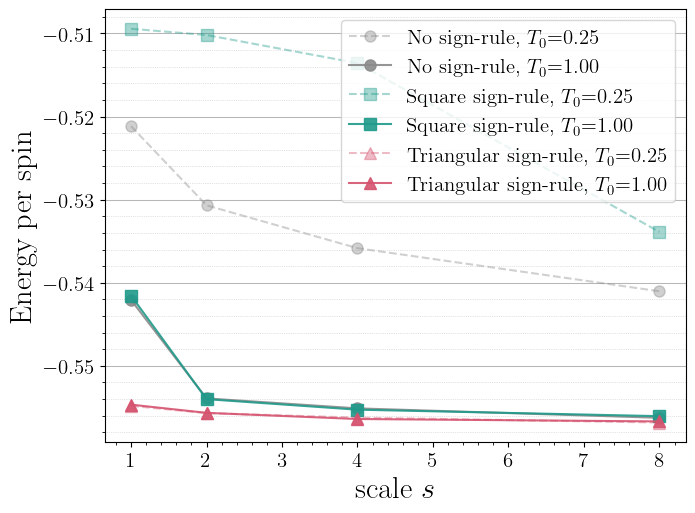

In [48]:
plt.figure(figsize=square_fig_size)

bc_ = 'periodic'
l_ = 6
rate = 0.475

for ms_i, ms in enumerate(mss):
    for T in Ts:
        T_st = "{:.2f}".format(T)
        to_plot_x = []
        to_plot_y = []
        for scale in scales:
            if 'final energy' in data[f'{ms}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_st}'][f'L={l_}'].keys():
                energy = data[f'{ms}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_st}'][f'L={l_}']['final energy']
                to_plot_x.append(scale)
                to_plot_y.append(energy)

        plt.errorbar(to_plot_x,to_plot_y, 
                    marker=sign_marker[ms],ms=8,
                    linestyle=T_lines[T_st],alpha=T_alphas[T_st],
                    color=scale_shades[ms][1.0],
                    label=f'{ms} sign-rule, $T_0$={T_st}')

add_gridlines(axes='y')
plt.legend(loc='center',bbox_to_anchor=(0.5,-0.35))
plt.legend(loc='upper right')
# learning_signs_legend(both_MS=True)

plt.xlabel('scale $s$', fontsize=bigger_font_size)
plt.ylabel('Energy per spin', fontsize=bigger_font_size)

filename = 'learning_signs'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

Need to adjust the plotting helper functions 
different markers for different curves, same color across curves indicate in legend, remove color bar (add in legend)

## Training curves

/Users/megan/miniconda3/envs/2DRNN/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/2DRNN/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/2DRNN/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/2DRNN/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/megan/miniconda3/envs/2DRNN/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asa

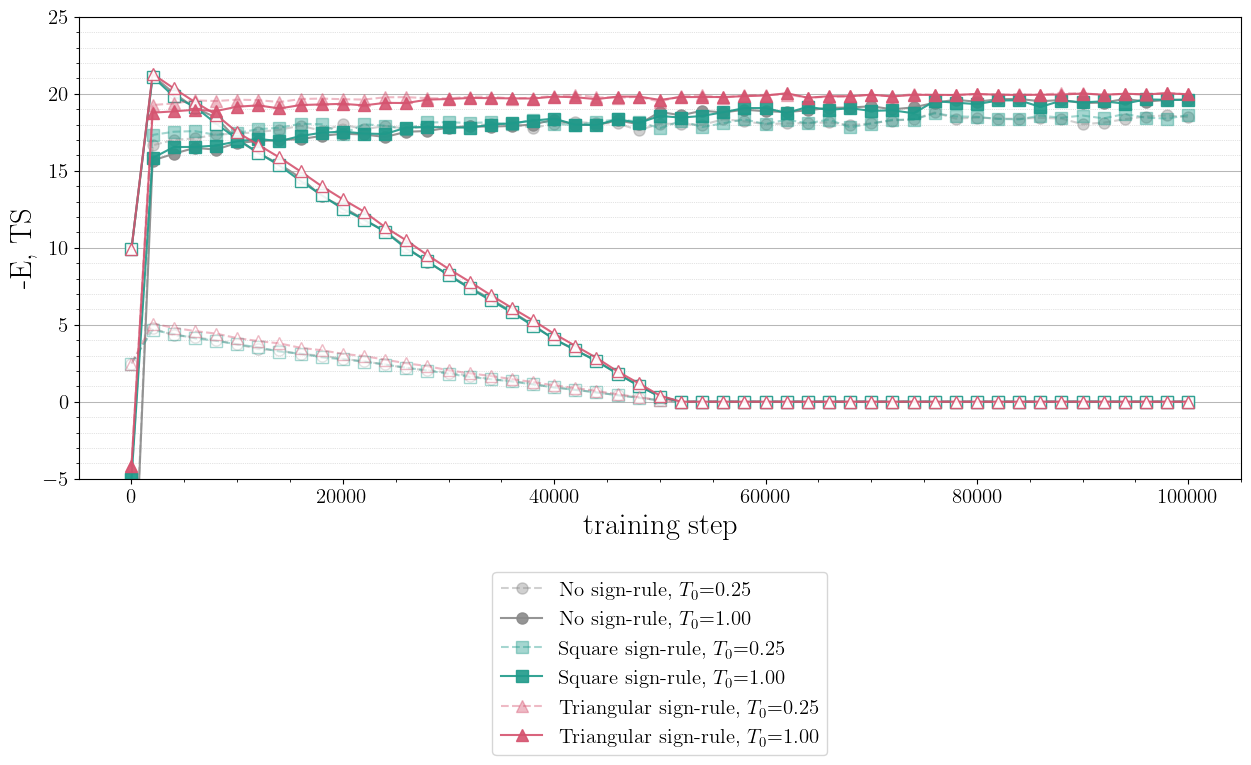

In [75]:
plt.figure(figsize=(15,6))

bc_ = 'periodic'
l_ = 6
rate = 0.475
scale = 1.0

for ms_i, ms in enumerate(mss):
    for T in Ts:
        T_st = "{:.2f}".format(T)
        energy = data[f'{ms}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_st}'][f'L={l_}']['energies']
        entropy = data[f'{ms}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_st}'][f'L={l_}']['entropy term']
        x = np.arange(len(energy))
        x_subsampled = x[::2000]
        plt.plot(x_subsampled,entropy[x_subsampled], 
                    marker=sign_marker[ms],ms=8,
                    linestyle=T_lines[T_st],alpha=T_alphas[T_st],
                    color=scale_shades[ms][1.0],
                    markerfacecolor='white',
                    )
        plt.plot(x_subsampled,-1*energy[x_subsampled], 
                    marker=sign_marker[ms],ms=8,
                    linestyle=T_lines[T_st],alpha=T_alphas[T_st],
                    color=scale_shades[ms][1.0],
                    label=f'{ms} sign-rule, $T_0$={T_st}')

add_gridlines(axes='y')
plt.legend(loc='center',bbox_to_anchor=(0.5,-0.4))
# plt.legend(loc='lower right')
# learning_signs_legend(both_MS=True)

plt.ylim(-5,25)
# plt.xlim(-10000,200000)
plt.xlabel('training step', fontsize=bigger_font_size)
plt.ylabel('-E, TS', fontsize=bigger_font_size)

filename = 'learning_signs_training_curves'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

# Correlations

In [37]:
from visualize_correlations import get_k_mesh, calculate_tri_kspace_correlations

In [42]:
which_MS = 'Square'
if which_MS=='No':
    color=scale_shades[which_MS][1.0]
    reorder=False
elif which_MS=='Square':
    color=scale_shades[which_MS][1.0]
    reorder=False
elif which_MS=='Triangular':
    color=scale_shades[which_MS][1.0]
    reorder=True


In [43]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(color[0], 1, N)[::-1]
vals[:, 1] = np.linspace(color[1], 1, N)[::-1]
vals[:, 2] = np.linspace(color[2], 1, N)[::-1]
newcmp = ListedColormap(vals)

T_0=0.25,s=1.0:  0.1572026280628199
T_0=1.00,s=1.0:  0.096758556431162
T_0=0.25,s=2.0:  0.15541794197012965
T_0=1.00,s=2.0:  0.09842698843362971
T_0=0.25,s=4.0:  0.13486472366771826
T_0=1.00,s=4.0:  0.0978088860843867
T_0=0.25,s=8.0:  0.09717039739067553
T_0=1.00,s=8.0:  0.09729489156126869


/var/folders/r0/9m7_nhn512dgbvny5lv_j91w0000gp/T/ipykernel_45523/3190515681.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


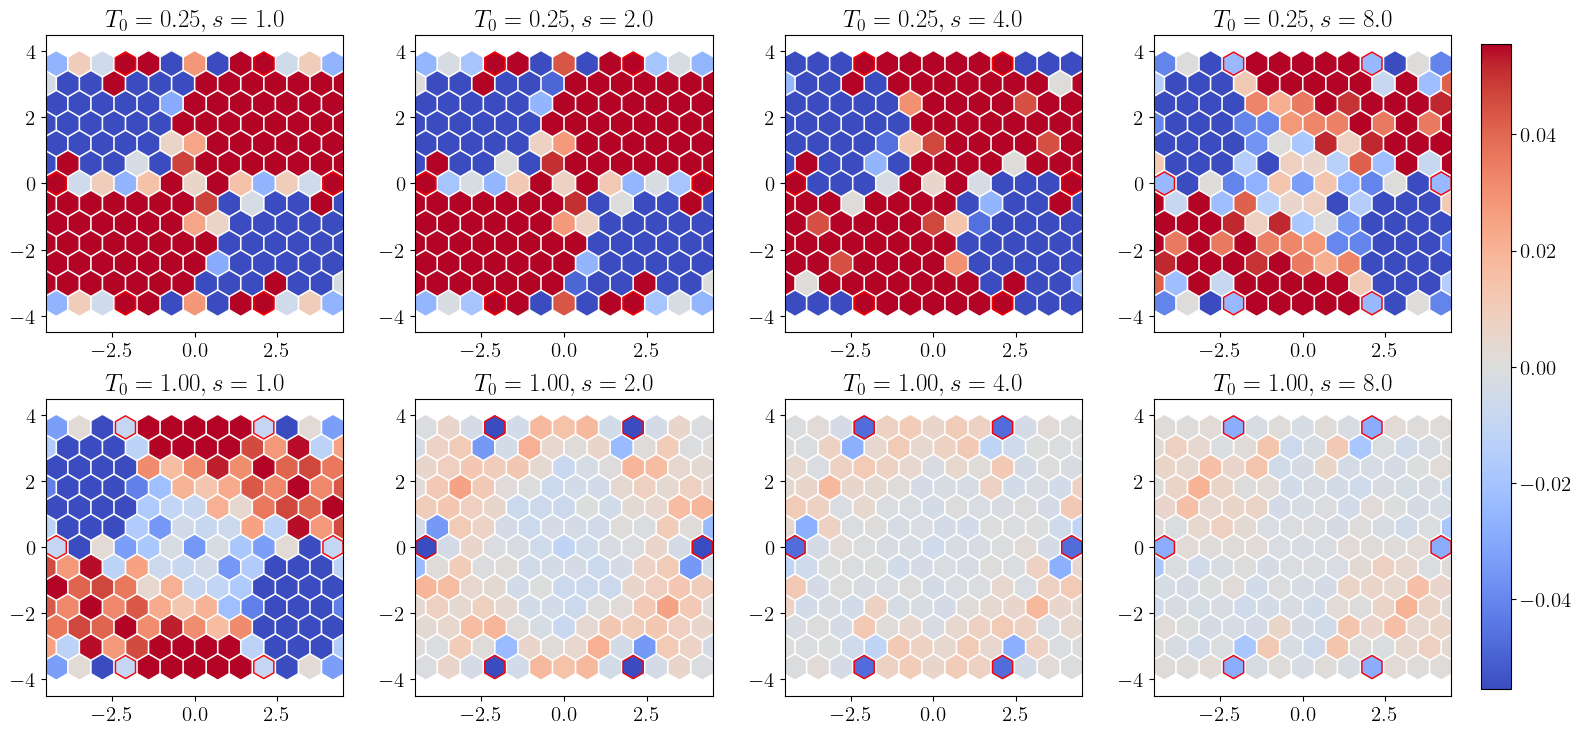

In [77]:
fig, axs = plt.subplots(2,len(scales),figsize=(column_width*len(scales),column_width*2))
markersize = 10000

use_zz = False
show_diff = True

L = 6
kpointsx,kpointsy = get_k_mesh(L)
N = L**2


best_SiSj = data[f'TriangularMS,periodicBC'][f"scale=8.0,rate=0.475,T={T_st}"][f"L={l}"]['Sz'] + data[f'TriangularMS,periodicBC'][f"scale=8.0,rate=0.475,T={T_st}"][f"L={L}"]['Sxy']
best_Sk = calculate_tri_kspace_correlations(L, best_SiSj, kpointsx, kpointsy, periodic=False, reorder=True)
best_corrs = best_Sk.flatten()

T = "{:.2f}".format(1.00)
if show_diff:
    cmap_ = 'coolwarm'
    vmin,vmax=-2/N,2/N
else:
    cmap_ = newcmp
    vmin,vmax=0,L
norm_ = mcolors.Normalize(vmin=vmin,vmax=vmax)

for scale_i, scale in enumerate([1.0,2.0,4.0,8.0]):        
    for T_i,T in enumerate([0.25,1.0]):
        T = "{:.2f}".format(T)

        if 'Sz' in data[f'{which_MS}MS,periodicBC'][f"scale={scale},rate=0.475,T={T}"][f"L={l}"].keys():

            if use_zz:
                rnn_Sij = 3*data[f'{which_MS}MS,periodicBC'][f"scale={scale},rate=0.475,T={T}"][f"L={l}"]['Sz']
            else:
                rnn_Sij = data[f'{which_MS}MS,periodicBC'][f"scale={scale},rate=0.475,T={T}"][f"L={l}"]['Sz'] + data[f'{which_MS}MS,periodicBC'][f"scale={scale},rate=0.475,T={T}"][f"L={L}"]['Sxy']

            Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, periodic=False, reorder=reorder)
            corrs = Sk.flatten()
            print(f"T_0={T},s={scale}: ",max(corrs)/N)

            marker_size = markersize / N
            if show_diff:
                sc = axs[T_i,scale_i].scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=best_corrs-corrs, cmap=cmap_,norm=norm_)
            else:
                sc = axs[T_i,scale_i].scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=cmap_,norm=norm_)

            highlight_k_points(axs[T_i,scale_i],marker_size=marker_size)
            axs[T_i,scale_i].set_title(f'$T_0={T},s={scale}$')
            axs[T_i,scale_i].set_ylim(-4.5,4.5)
            axs[T_i,scale_i].set_xlim(-4.5,4.5)
            axs[T_i,scale_i].set_box_aspect(1)

cbar_ax = fig.add_axes([1., 0.07, 0.02, 0.86])
fig.colorbar(cm.ScalarMappable(norm=norm_, cmap=cmap_), cax=cbar_ax)
plt.tight_layout()
plt.show()